In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("shop_smart_ecommerce.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [25]:
classes_count = df["Revenue"].value_counts()
classes_count


Revenue
0    10422
1     1908
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()  # User for ordinal Data -- when matter order in dataset
df["Revenue"] = le.fit_transform(df["Revenue"])
df["Weekend"] = le.fit_transform(df["Weekend"])

# one hot encoding

cols = ["Month", "VisitorType"]

ohe = OneHotEncoder(
    drop="first",
    sparse_output=False,
    handle_unknown="ignore"
)

# Fit & transform
encoded = ohe.fit_transform(df[cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(
    encoded,
    columns=ohe.get_feature_names_out(cols),
    index=df.index
)

# Drop original columns and concatenate
df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)


In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


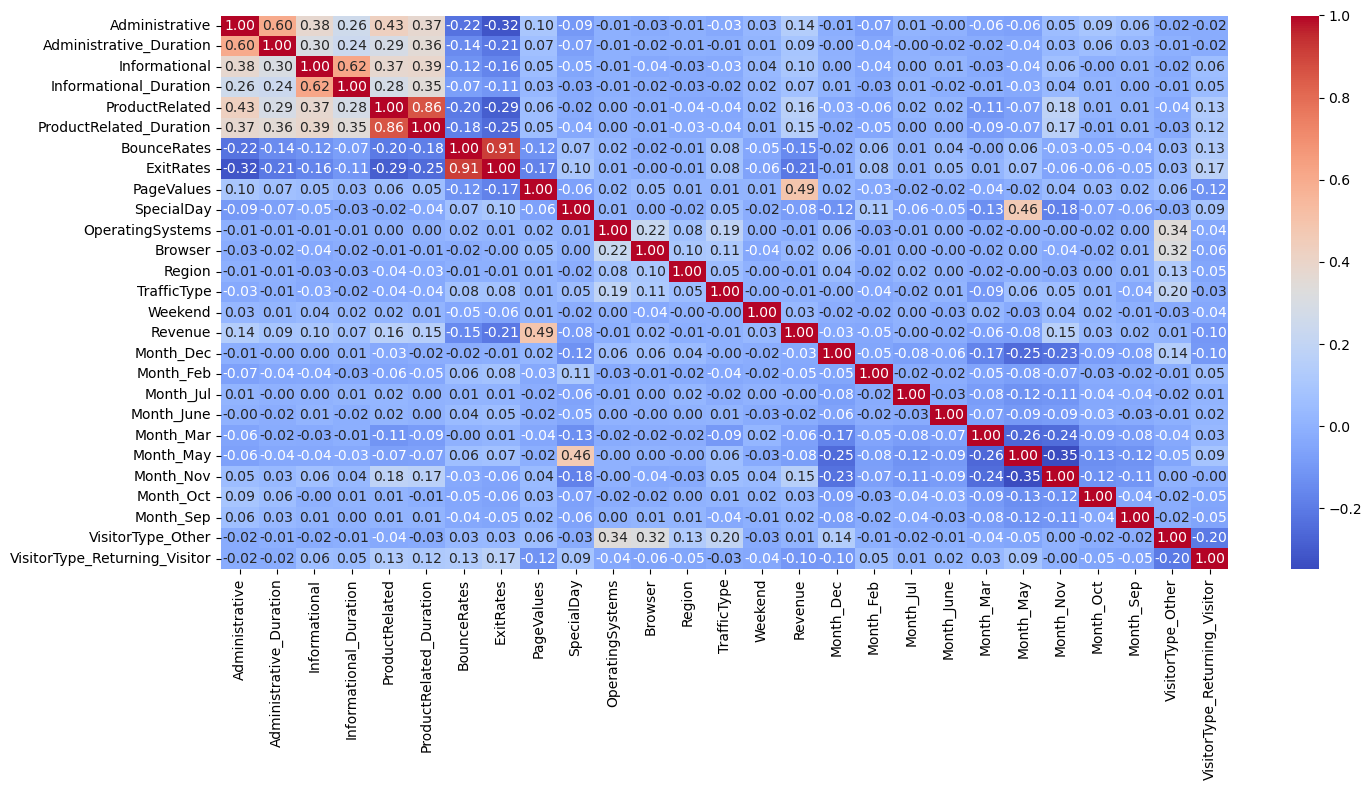

In [10]:
num_cols = df.select_dtypes(include="number")

corr_matrix = num_cols.corr()
corr_matrix

plt.figure(figsize=(15,8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.tight_layout()
plt.show()

In [12]:
num_cols.corr()["Revenue"].sort_values(ascending=False)

Revenue                          1.000000
PageValues                       0.492569
ProductRelated                   0.158538
Month_Nov                        0.154774
ProductRelated_Duration          0.152373
Administrative                   0.138917
Informational                    0.095200
Administrative_Duration          0.093587
Informational_Duration           0.070345
Month_Oct                        0.032666
Weekend                          0.029295
Browser                          0.023984
Month_Sep                        0.019983
VisitorType_Other                0.007715
Month_Jul                       -0.001036
TrafficType                     -0.005113
Region                          -0.011595
OperatingSystems                -0.014668
Month_June                      -0.023112
Month_Dec                       -0.033112
Month_Feb                       -0.047114
Month_Mar                       -0.063941
Month_May                       -0.078320
SpecialDay                      -0

<Axes: xlabel='PageValues', ylabel='Count'>

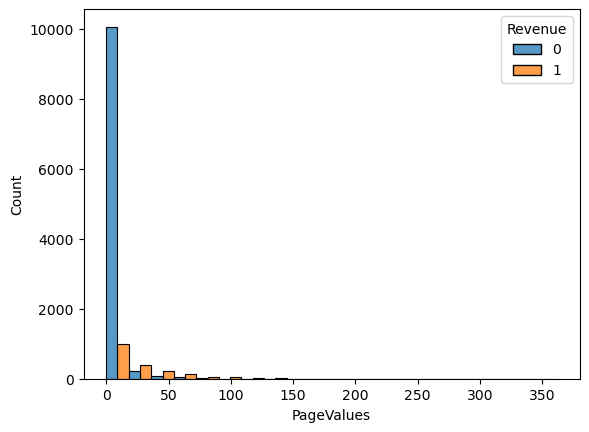

In [13]:
sns.histplot(
    data = df,
    x = "PageValues",
    hue="Revenue",
    bins =20,
    multiple="dodge"
)

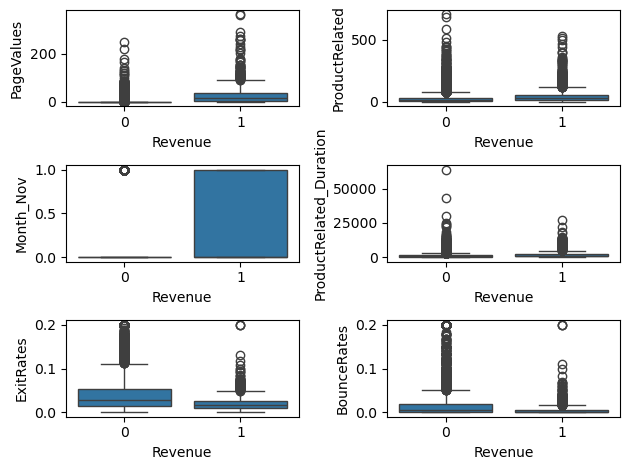

In [18]:
fig, axes = plt.subplots(3,2)

sns.boxplot(ax=axes[0][0], data=df, x="Revenue", y="PageValues")
sns.boxplot(ax=axes[0][1], data=df, x="Revenue", y="ProductRelated")
sns.boxplot(ax=axes[1][0], data=df, x="Revenue", y="Month_Nov")
sns.boxplot(ax=axes[1][1], data=df, x="Revenue", y="ProductRelated_Duration")
sns.boxplot(ax=axes[2][0], data=df, x="Revenue", y="ExitRates")
sns.boxplot(ax=axes[2][1], data=df, x="Revenue", y="BounceRates")

plt.tight_layout()
plt.show()

In [19]:
X = df.drop("Revenue", axis=1)
y = df["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Decision Tree Model Building - no pruning
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, f1_score

y_pred = model.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1_Score: ", f1_score(y_test, y_pred))


Accuracy Score:  0.8536090835360909
F1_Score:  0.5570552147239264


In [30]:
# Decision Tree With pre-pruning
from sklearn.metrics import classification_report, roc_auc_score
max_depths = [2,3,4,5,6,7,8,9,10]

for depth in max_depths:  
    model = DecisionTreeClassifier(max_depth=depth,class_weight="balanced")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("F1_Score: ", f1_score(y_test, y_pred))


Accuracy Score:  0.8714517437145174
F1_Score:  0.676200204290092
Accuracy Score:  0.8353609083536091
F1_Score:  0.6381461675579323
Accuracy Score:  0.8329278183292782
F1_Score:  0.6334519572953736
Accuracy Score:  0.83779399837794
F1_Score:  0.6323529411764706
Accuracy Score:  0.8357664233576643
F1_Score:  0.6287809349220899
Accuracy Score:  0.8386050283860503
F1_Score:  0.6280373831775701
Accuracy Score:  0.8402270884022709
F1_Score:  0.6240458015267175
Accuracy Score:  0.843065693430657
F1_Score:  0.6282420749279539
Accuracy Score:  0.8410381184103812
F1_Score:  0.6201550387596899


In [32]:
min_samples_splits = [5, 10, 15, 20, 25, 30]


model = DecisionTreeClassifier(max_depth=6,min_samples_leaf=30, class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1_Score: ", f1_score(y_test, y_pred))

Accuracy Score:  0.8414436334144363
F1_Score:  0.6356011183597391
